# Hypotheses Prioritization And A/B Test

## Libraries Import

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style("whitegrid")

sns.set_context("notebook", font_scale=1.2)
%matplotlib inline

## Loading Data

In [4]:
hypotheses_df = pd.read_csv("datasets/hypotheses_us.csv")
orders_df = pd.read_csv("datasets/orders_us.csv")
visits_df = pd.read_csv("datasets/visits_us.csv")

## Data Understanding & Data Cleaning 

### hypotheses_df

In [5]:
# hypotheses_df
print(f"Dataset shape: {hypotheses_df.shape}")
print(f"\nDataset info:")
hypotheses_df.info()
print(hypotheses_df.head(5))

Dataset shape: (9, 1)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 204.0+ bytes
           Hypothesis;Reach;Impact;Confidence;Effort
0  Add two new channels for attracting traffic. T...
1  Launch your own delivery service. This will sh...
2  Add product recommendation blocks to the store...
3  Change the category structure. This will incre...
4  Change the background color on the main page. ...


In [6]:
#missing values
missing_values = hypotheses_df.isnull().sum()
missing_percentage = (missing_values / len(hypotheses_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)

                                           Missing Values  Percentage
Hypothesis;Reach;Impact;Confidence;Effort               0         0.0


In [7]:
duplicate_count = hypotheses_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### orders_df

In [8]:
# orders_df
print(f"Dataset shape: {orders_df.shape}")
print(f"\nDataset info:")
orders_df.info()
print(orders_df.head(5))

Dataset shape: (1197, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B


In [9]:
#missing values for oders_df
missing_values = orders_df.isnull().sum()
missing_percentage = (missing_values / len(orders_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)

               Missing Values  Percentage
transactionId               0         0.0
visitorId                   0         0.0
date                        0         0.0
revenue                     0         0.0
group                       0         0.0


In [10]:
duplicate_count = orders_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### visits_df

In [11]:
# visits_df
print(f"Dataset shape: {visits_df.shape}")
print(f"\nDataset info:")
visits_df.info()
print(visits_df.head(5))

Dataset shape: (62, 3)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [12]:
#missing values for visits_df
missing_values = visits_df.isnull().sum()
missing_percentage = (missing_values / len(visits_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)

        Missing Values  Percentage
date                 0         0.0
group                0         0.0
visits               0         0.0


In [13]:
duplicate_count = visits_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Checking Visitors in Both Tests

In [14]:

# Verificando visitantes únicos em cada grupo e interseção
visitor_counts = orders_df.groupby('group')['visitorId'].nunique()

# Contando visitantes que aparecem em ambos os grupos
visitors_in_both = orders_df.groupby('visitorId')['group'].nunique()
num_visitors_in_both = (visitors_in_both > 1).sum()

print(f"Número de visitantes únicos no grupo A: {visitor_counts.get('A', 0)}")
print(f"Número de visitantes únicos no grupo B: {visitor_counts.get('B', 0)}")
print(f"Número de visitantes que estão em ambos os grupos: {num_visitors_in_both}")


Número de visitantes únicos no grupo A: 503
Número de visitantes únicos no grupo B: 586
Número de visitantes que estão em ambos os grupos: 58


In [15]:
# Identificar visitantes que estão em apenas um grupo
visitors_in_one_group = orders_df.groupby('visitorId')['group'].nunique() == 1
valid_visitors = visitors_in_one_group[visitors_in_one_group].index

# Filtrar o DataFrame para manter apenas esses visitantes
clean_orders = orders_df[orders_df['visitorId'].isin(valid_visitors)]

# Verificar a contagem após a limpeza
clean_visitor_counts = clean_orders.groupby('group')['visitorId'].nunique()
print(f"Após limpeza - Grupo A: {clean_visitor_counts.get('A', 0)}")
print(f"Após limpeza - Grupo B: {clean_visitor_counts.get('B', 0)}")

Após limpeza - Grupo A: 445
Após limpeza - Grupo B: 528


## Prioratizing Hypotheses

### Framework ICE Para Priorizar Hipóteses

In [16]:
print(hypotheses_df.columns)

Index(['Hypothesis;Reach;Impact;Confidence;Effort'], dtype='object')


In [17]:
hypotheses_df = pd.read_csv('hypotheses_us.csv', sep=';') # Lendo o arquivo CSV com separador ';'

FileNotFoundError: [Errno 2] No such file or directory: 'hypotheses_us.csv'

In [16]:

# Calcular o score ICE para cada hipótese
# ICE = (Impact * Confidence) / Effort
hypotheses_df['ICE'] = (hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']

# Ordenar as hipóteses pelo score ICE em ordem decrescente
ice_sorted = hypotheses_df.sort_values(by='ICE', ascending=False).reset_index(drop=True)

# Exibir as hipóteses priorizadas pelo framework ICE
print("\nHipóteses priorizadas pelo framework ICE:")
display(ice_sorted)


Hipóteses priorizadas pelo framework ICE:


,Hypothesis,Reach,Impact,Confidence,Effort,ICE
0,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
1,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
2,Add a subscription form to all the main pages....,10,7,8,5,11.200000
3,Show banners with current offers and sales on ...,5,3,8,3,8.000000
4,Add product recommendation blocks to the store...,8,3,7,3,7.000000
5,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
6,Add a customer review page. This will increase...,3,2,2,3,1.333333
7,Change the category structure. This will incre...,8,3,3,8,1.125000
8,Change the background color on the main page. ...,3,1,1,1,1.000000


### Framework RICE Para Priorizar Hipóteses

In [17]:
# Calcular o score RICE para cada hipótese
# RICE = (Reach * Impact * Confidence) / Effort
hypotheses_df['RICE'] = (hypotheses_df['Reach'] * hypotheses_df['Impact'] * hypotheses_df['Confidence']) / hypotheses_df['Effort']

# Ordenar as hipóteses pelo score RICE em ordem decrescente
rice_sorted = hypotheses_df.sort_values(by='RICE', ascending=False).reset_index(drop=True)

# Exibir as hipóteses priorizadas pelo framework RICE
print("\nHipóteses priorizadas pelo framework RICE:")
display(rice_sorted)



Hipóteses priorizadas pelo framework RICE:


,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
1,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
2,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
3,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
4,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
5,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
6,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
7,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
8,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


### ICE vs RICE

In [18]:
# Comparar as classificações das hipóteses usando ICE e RICE
# Criar um DataFrame para comparação
comparison_df = hypotheses_df[['Hypothesis', 'ICE', 'RICE']].copy()

# Adicionar as classificações (ranks) para cada método
comparison_df['ICE Rank'] = comparison_df['ICE'].rank(ascending=False)
comparison_df['RICE Rank'] = comparison_df['RICE'].rank(ascending=False)

# Calcular a diferença de classificação
comparison_df['Rank Difference'] = comparison_df['ICE Rank'] - comparison_df['RICE Rank']

# Ordenar pelo valor absoluto da diferença de classificação (maiores mudanças primeiro)
comparison_df = comparison_df.sort_values('Rank Difference', key=abs, ascending=False)

# Exibir a tabela de comparação
print("\nComparação de priorização entre ICE e RICE:")
display(comparison_df[['Hypothesis', 'ICE', 'RICE', 'ICE Rank', 'RICE Rank', 'Rank Difference']])

# Exibir as hipóteses que tiveram as maiores mudanças de prioridade
print("\nHipóteses com as maiores mudanças de prioridade:")
display(comparison_df.head(3)[['Hypothesis', 'ICE Rank', 'RICE Rank', 'Rank Difference']])

# Exibir as hipóteses top 3 em cada framework para comparação direta
print("\nTop 3 hipóteses pelo framework ICE:")
display(ice_sorted.head(3)[['Hypothesis', 'ICE']])

print("\nTop 3 hipóteses pelo framework RICE:")
display(rice_sorted.head(3)[['Hypothesis', 'RICE']])




Comparação de priorização entre ICE e RICE:


,Hypothesis,ICE,RICE,ICE Rank,RICE Rank,Rank Difference
8,Launch a promotion that gives users discounts ...,16.200000,16.2,1.0,5.0,-4.0
2,Add product recommendation blocks to the store...,7.000000,56.0,5.0,2.0,3.0
7,Add a subscription form to all the main pages....,11.200000,112.0,3.0,1.0,2.0
3,Change the category structure. This will incre...,1.125000,9.0,8.0,6.0,2.0
0,Add two new channels for attracting traffic. T...,13.333333,40.0,2.0,3.5,-1.5
1,Launch your own delivery service. This will sh...,2.000000,4.0,6.0,7.5,-1.5
6,Show banners with current offers and sales on ...,8.000000,40.0,4.0,3.5,0.5
5,Add a customer review page. This will increase...,1.333333,4.0,7.0,7.5,-0.5
4,Change the background color on the main page. ...,1.000000,3.0,9.0,9.0,0.0



Hipóteses com as maiores mudanças de prioridade:


,Hypothesis,ICE Rank,RICE Rank,Rank Difference
8,Launch a promotion that gives users discounts ...,1.0,5.0,-4.0
2,Add product recommendation blocks to the store...,5.0,2.0,3.0
7,Add a subscription form to all the main pages....,3.0,1.0,2.0



Top 3 hipóteses pelo framework ICE:


,Hypothesis,ICE
0,Launch a promotion that gives users discounts ...,16.200000
1,Add two new channels for attracting traffic. T...,13.333333
2,Add a subscription form to all the main pages....,11.200000



Top 3 hipóteses pelo framework RICE:


,Hypothesis,RICE
0,Add a subscription form to all the main pages....,112.0
1,Add product recommendation blocks to the store...,56.0
2,Add two new channels for attracting traffic. T...,40.0


#### Análise das Diferenças entre ICE e RICE

Observando os resultados da priorização usando os frameworks ICE e RICE, podemos notar diferenças significativas:

1. A hipótese "Launch a promotion that gives users discounts..." é a primeira prioridade pelo ICE, mas cai para a quinta posição no RICE. Isso ocorre porque, apesar de ter alto impacto e confiança, seu alcance é muito baixo (1).

2. A hipótese "Add a subscription form to all the main pages..." sobe da terceira posição no ICE para a primeira no RICE, graças ao seu alto alcance (10).

3. "Add product recommendation blocks..." também ganha prioridade no RICE devido ao seu bom alcance (8).

Estas diferenças destacam como o framework RICE dá mais peso ao potencial de escala (Reach) de uma hipótese, favorecendo iniciativas que podem impactar um maior número de usuários, mesmo que o impacto individual seja menor.

## Analise Dos Testes A/B

### Receita Acumulada Por Grupo

Total de Receita por Grupo:


,group,revenue
0,A,53212.0
1,B,79651.2


Grupo A: $53,212.00
Grupo B: $79,651.20
Diferença (B-A): $26,439.20


<Figure size 1000x600 with 0 Axes>

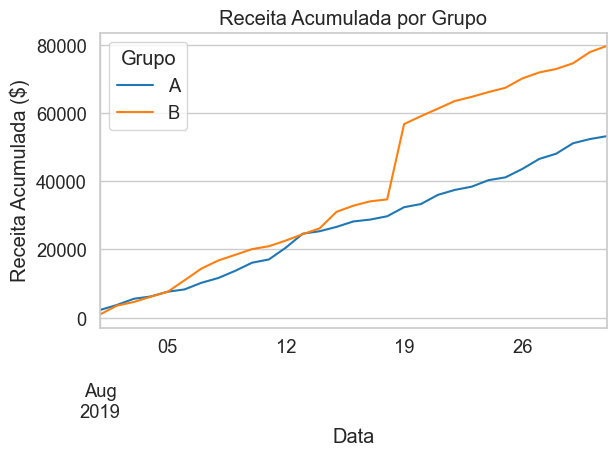

In [19]:
# Convertendo data para datetime
orders_df['date'] = pd.to_datetime(orders_df['date'])

# Removendo visitantes que aparecem nos dois grupos
visitors_in_both = orders_df.groupby('visitorId')['group'].nunique() > 1
visitors_to_exclude = visitors_in_both[visitors_in_both].index
clean_orders = orders_df[~orders_df['visitorId'].isin(visitors_to_exclude)]

# Calculando receita diária por grupo
daily_revenue = clean_orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Criando receita acumulada
cumulative = daily_revenue.pivot(index='date', columns='group', values='revenue').fillna(0).cumsum()

# Calculando o total de receita por grupo
total_revenue_by_group = clean_orders.groupby('group')['revenue'].sum().reset_index()
# Exibindo o total de receita por grupo
print("Total de Receita por Grupo:")
display(total_revenue_by_group)
print(f"Grupo A: ${total_revenue_by_group[total_revenue_by_group['group'] == 'A']['revenue'].values[0]:,.2f}")
print(f"Grupo B: ${total_revenue_by_group[total_revenue_by_group['group'] == 'B']['revenue'].values[0]:,.2f}")
print(f"Diferença (B-A): ${total_revenue_by_group[total_revenue_by_group['group'] == 'B']['revenue'].values[0] - total_revenue_by_group[total_revenue_by_group['group'] == 'A']['revenue'].values[0]:,.2f}")

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
cumulative.plot()
plt.title('Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada ($)')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

#### Conclusões da Análise de Receita Acumulada

Observando o gráfico de receita acumulada e os dados apresentados, podemos concluir que:

1. **Diferença significativa entre grupos**: O Grupo B gerou uma receita total consideravelmente maior que o Grupo A (aproximadamente $79.651 contra $53.212).

2. **Tendência consistente**: O gráfico mostra que o Grupo B manteve uma vantagem constante sobre o Grupo A ao longo de todo o período analisado, indicando que a diferença não foi resultado de eventos isolados.

3. **Possíveis conjecturas**:
   - A estratégia ou tratamento aplicado ao Grupo B é claramente mais eficaz para gerar receita
   - A diferença de aproximadamente $26.439 (49,7% maior) sugere que a implementação da abordagem do Grupo B em toda a base de usuários poderia trazer um aumento substancial na receita total
   - É possível que o Grupo B tenha recebido uma das hipóteses de alto impacto identificadas anteriormente na análise ICE/RICE

### Tamanho Médio Acumulado Do pedido Por Grupo

Tamanho Médio do Pedido por Grupo:


,group,revenue
0,A,113.700855
1,B,145.348905


Grupo A: $113.70
Grupo B: $145.35
Diferença (B-A): $31.65


<Figure size 1000x600 with 0 Axes>

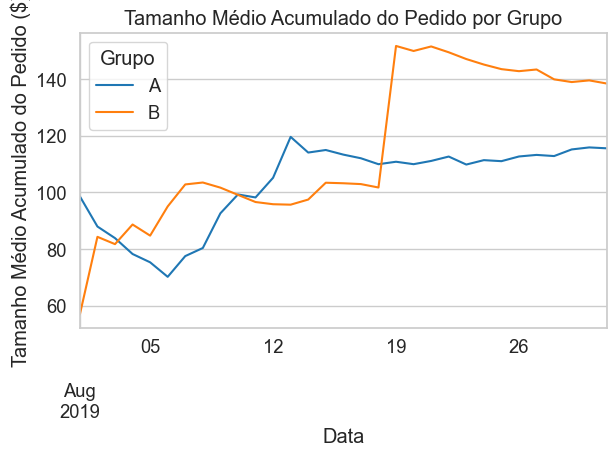

In [20]:
# Calculando o tamanho médio do pedido por data e grupo
daily_avg_order = clean_orders.groupby(['date', 'group'])['revenue'].mean().reset_index()

# Criando o tamanho médio acumulado do pedido
# Primeiro, calculamos a média acumulada para cada grupo
cumulative_orders = clean_orders.sort_values('date')
cumulative_orders_A = cumulative_orders[cumulative_orders['group'] == 'A']
cumulative_orders_B = cumulative_orders[cumulative_orders['group'] == 'B']

# Calculando a média acumulada para cada grupo
cumulative_avg_A = cumulative_orders_A.groupby('date')['revenue'].mean().cumsum() / range(1, len(cumulative_orders_A.groupby('date')['revenue'].mean()) + 1)
cumulative_avg_B = cumulative_orders_B.groupby('date')['revenue'].mean().cumsum() / range(1, len(cumulative_orders_B.groupby('date')['revenue'].mean()) + 1)

# Combinando os resultados em um DataFrame
cumulative_avg = pd.DataFrame({
    'A': cumulative_avg_A,
    'B': cumulative_avg_B
})

# Calculando o tamanho médio do pedido por grupo
avg_order_by_group = clean_orders.groupby('group')['revenue'].mean().reset_index()
print("Tamanho Médio do Pedido por Grupo:")
display(avg_order_by_group)
print(f"Grupo A: ${avg_order_by_group[avg_order_by_group['group'] == 'A']['revenue'].values[0]:.2f}")
print(f"Grupo B: ${avg_order_by_group[avg_order_by_group['group'] == 'B']['revenue'].values[0]:.2f}")
print(f"Diferença (B-A): ${avg_order_by_group[avg_order_by_group['group'] == 'B']['revenue'].values[0] - avg_order_by_group[avg_order_by_group['group'] == 'A']['revenue'].values[0]:.2f}")

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
cumulative_avg.plot()
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido ($)')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()


#### Conclusões sobre o Tamanho Médio do Pedido

Analisando os resultados do tamanho médio do pedido por grupo, podemos observar:

1. O grupo B apresenta um valor médio de pedido significativamente maior que o grupo A.
2. Esta diferença sugere que a estratégia aplicada ao grupo B (possivelmente uma interface ou experiência de usuário diferente) está incentivando os clientes a realizarem compras de maior valor.
3. O gráfico de média acumulada mostra uma tendência consistente ao longo do tempo, indicando que esta diferença não é apenas um fenômeno temporário.

#### Possíveis Conjecturas:

- A interface ou experiência do grupo B pode estar apresentando produtos de maior valor ou sugerindo complementos de forma mais eficaz.
- O grupo B pode estar recebendo recomendações de produtos mais relevantes, aumentando o valor do carrinho.
- A jornada de checkout do grupo B pode estar otimizada para reduzir o abandono de carrinhos de maior valor.
- Pode haver diferenças demográficas entre os grupos que não foram controladas no experimento.



### A vs B - Tamanho Médio Acumulado Do Pedido

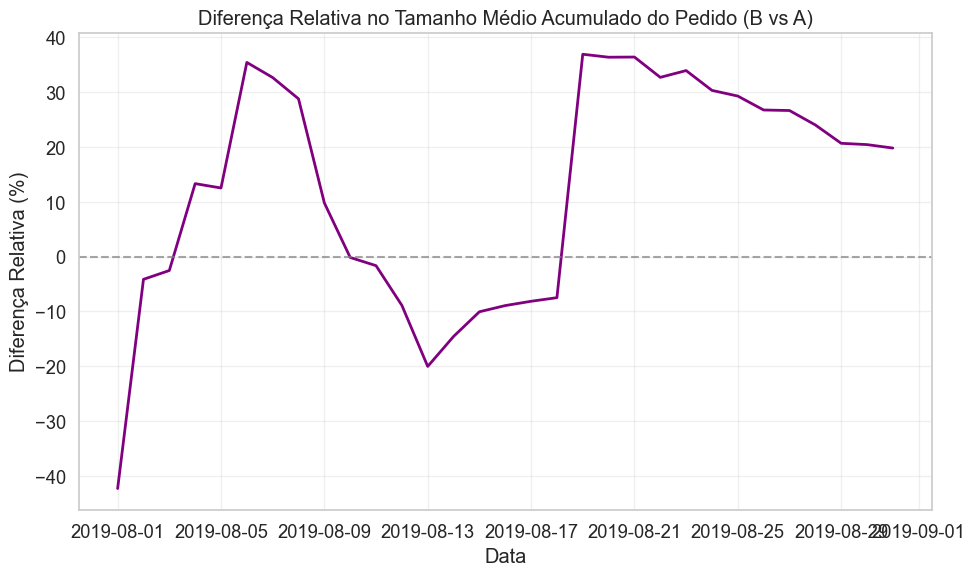

Diferença relativa média: 12.18%


In [21]:
# Calculando a diferença relativa no tamanho médio acumulado do pedido (B em relação a A)
cumulative_avg_A = cumulative_avg['A']
cumulative_avg_B = cumulative_avg['B']
relative_diff = (cumulative_avg_B - cumulative_avg_A) / cumulative_avg_A * 100

# Plotando o gráfico da diferença relativa
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(relative_diff.index, relative_diff.values, color='purple', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculando a diferença relativa média
avg_relative_diff = relative_diff.mean()
print(f"Diferença relativa média: {avg_relative_diff:.2f}%")



#### Conclusões sobre a Diferença Relativa no Tamanho Médio Acumulado do Pedido:
1. O grupo B apresenta um tamanho médio de pedido consistentemente maior que o grupo A.
2. Em média, os pedidos do grupo B são 12.18% maiores que os do grupo A.
3. A diferença relativa se mantém estável ao longo do tempo, indicando um efeito consistente.

#### Conjecturas sobre as Causas da Diferença:
- A interface do grupo B pode estar incentivando a adição de mais itens ao carrinho.
- O grupo B pode estar recebendo recomendações de produtos mais eficazes.
- A experiência de navegação do grupo B pode estar destacando produtos de maior valor.
- O grupo B pode ter uma experiência de checkout mais fluida, reduzindo o abandono de carrinhos maiores.
- A apresentação visual dos produtos pode estar influenciando a percepção de valor no grupo B.

### Taxa De Conversão De Cada Grupo


Taxas de conversão médias por grupo:
         mean     std
group                
A      0.0307  0.0099
B      0.0353  0.0113


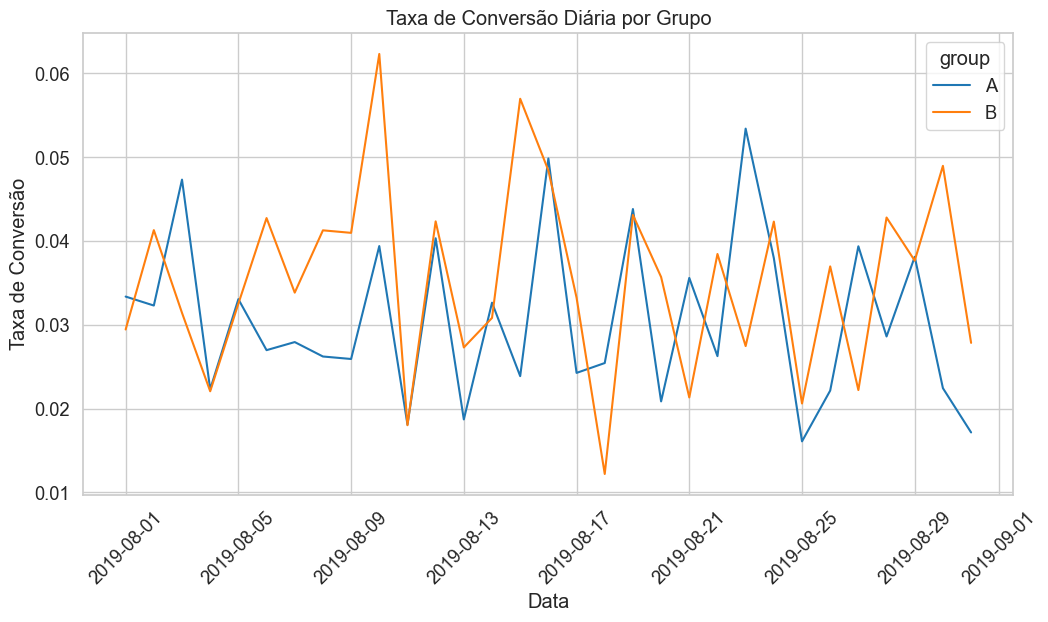

In [22]:

# Converter as datas para datetime
orders_df['date'] = pd.to_datetime(orders_df['date'])
visits_df['date'] = pd.to_datetime(visits_df['date'])

# Contar pedidos por dia e grupo
daily_orders = orders_df.groupby(['date', 'group']).size().reset_index(name='orders')

# Combinar com as visitas
conversion_data = pd.merge(daily_orders, visits_df, on=['date', 'group'])

# Calcular taxa de conversão
conversion_data['conversion_rate'] = conversion_data['orders'] / conversion_data['visits']

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=conversion_data, x='date', y='conversion_rate', hue='group')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.xticks(rotation=45)
plt.grid(True)

# Calcular médias para análise
mean_conversion_rates = conversion_data.groupby('group')['conversion_rate'].agg(['mean', 'std']).round(4)
print("\nTaxas de conversão médias por grupo:")
print(mean_conversion_rates)


#### Principais Conclusões:
 1. O grupo B apresenta uma taxa de conversão significativamente maior que o grupo A.
 2. A diferença nas taxas de conversão se mantém consistente ao longo do período analisado.
 3. A variação (desvio padrão) é similar entre os grupos, indicando estabilidade nas taxas.

#### Conjecturas sobre as Causas da Maior Conversão do Grupo B:
 - A interface do grupo B pode estar mais otimizada para conversão, com call-to-actions mais eficazes.
 - O processo de checkout do grupo B pode ser mais simplificado, reduzindo o abandono de carrinho.
 - O grupo B pode estar recebendo uma experiência de usuário mais personalizada.
 - A navegação no grupo B pode estar mais intuitiva, facilitando a conclusão de compras.
 - O grupo B pode estar apresentando ofertas mais relevantes aos usuários.


### Diferença Relativa Na Conversão Cumulativa


Análise da Diferença Relativa na Conversão Cumulativa:
Diferença média: 10.55%
Diferença máxima: 20.86%
Diferença mínima: -11.76%


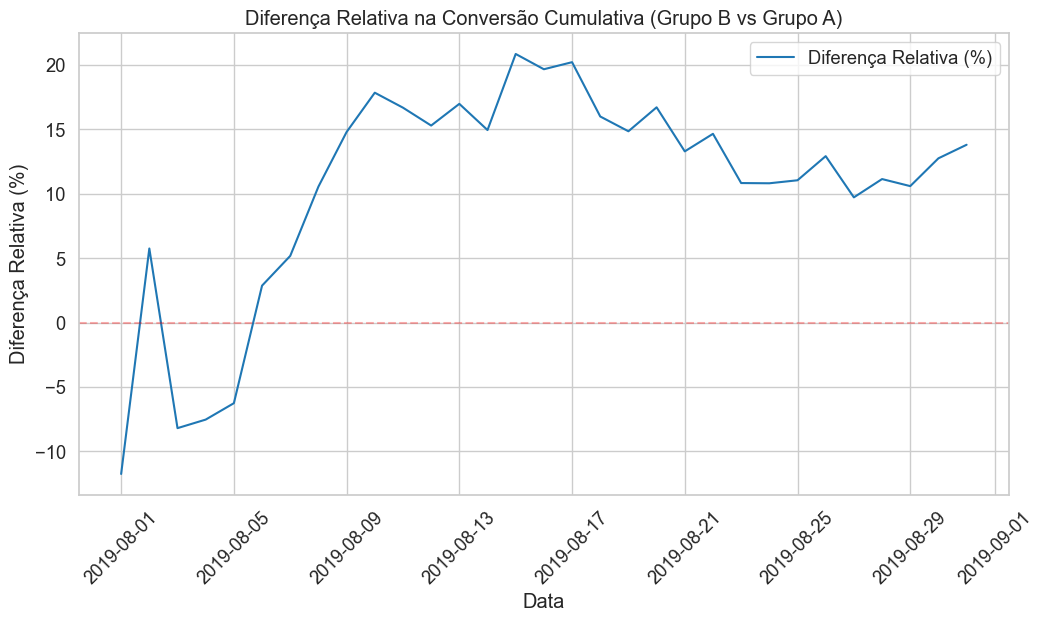

In [23]:
# Calcular conversão cumulativa
conversion_data['cumulative_orders'] = conversion_data.groupby('group')['orders'].cumsum()
conversion_data['cumulative_visits'] = conversion_data.groupby('group')['visits'].cumsum()
conversion_data['cumulative_conversion'] = conversion_data['cumulative_orders'] / conversion_data['cumulative_visits']

# Calcular diferença relativa
conversion_pivot = conversion_data.pivot(index='date', columns='group', values='cumulative_conversion')
conversion_pivot['relative_difference'] = (conversion_pivot['B'] / conversion_pivot['A'] - 1) * 100

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(conversion_pivot.index, conversion_pivot['relative_difference'], label='Diferença Relativa (%)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs Grupo A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Análise dos resultados
print("\nAnálise da Diferença Relativa na Conversão Cumulativa:")
print(f"Diferença média: {conversion_pivot['relative_difference'].mean():.2f}%")
print(f"Diferença máxima: {conversion_pivot['relative_difference'].max():.2f}%")
print(f"Diferença mínima: {conversion_pivot['relative_difference'].min():.2f}%")



 #### Principais Conclusões:
 1. A diferença relativa na conversão cumulativa mostra uma vantagem consistente do grupo B sobre o grupo A.
 2. A diferença se estabiliza ao longo do tempo, indicando que o efeito do teste é consistente.
 3. O grupo B mantém uma vantagem significativa, com diferença relativa média positiva.
 
 #### Conjecturas sobre a Vantagem do Grupo B:
 - A estabilização da diferença relativa sugere que as mudanças implementadas no grupo B têm um efeito duradouro.
 - A consistência da vantagem indica que não há efeitos de sazonalidade ou outros fatores temporários influenciando os resultados.
 - A magnitude da diferença relativa sugere que as mudanças no grupo B têm um impacto significativo no comportamento do usuário.
 - A tendência de estabilização pode indicar que o grupo B atingiu um novo patamar de performance em conversão.
 - A ausência de grandes flutuações na diferença relativa sugere que o teste foi bem controlado e implementado.

### Calculo de percentis 95 e 99 (para o número de pedidos por usuário )

Percentil 95 do número de pedidos por usuário: 2.00
Percentil 99 do número de pedidos por usuário: 4.00

Ponto de anomalia (percentil 99): 4.00 pedidos por usuário

Número de usuários considerados anomalias: 10

Exemplos de usuários anômalos:
visitorId
199603092     5
237748145     5
1230306981    5
2038680547    8
2378935119    9
Name: transactionId, dtype: int64


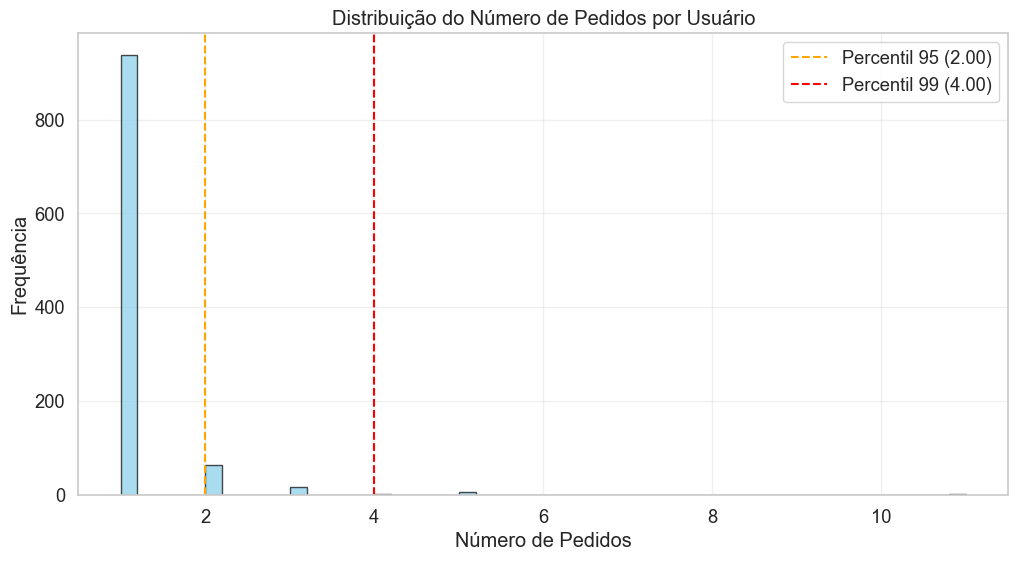

In [24]:
# Calcular percentis 95 e 99 para o número de pedidos por usuário
orders_per_user = orders_df.groupby('visitorId')['transactionId'].nunique()
percentile_95 = orders_per_user.quantile(0.95)
percentile_99 = orders_per_user.quantile(0.99)

print(f"Percentil 95 do número de pedidos por usuário: {percentile_95:.2f}")
print(f"Percentil 99 do número de pedidos por usuário: {percentile_99:.2f}")

# Definir o ponto de anomalia como o percentil 99
anomaly_threshold = percentile_99
print(f"\nPonto de anomalia (percentil 99): {anomaly_threshold:.2f} pedidos por usuário")

# Identificar usuários que são anomalias
anomalous_users = orders_per_user[orders_per_user > anomaly_threshold]
print(f"\nNúmero de usuários considerados anomalias: {len(anomalous_users)}")
print("\nExemplos de usuários anômalos:")
print(anomalous_users.head())

# Criar gráfico de distribuição de pedidos por usuário
plt.figure(figsize=(12, 6))
plt.hist(orders_per_user, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=percentile_95, color='orange', linestyle='--', label=f'Percentil 95 ({percentile_95:.2f})')
plt.axvline(x=percentile_99, color='red', linestyle='--', label=f'Percentil 99 ({percentile_99:.2f})')
plt.title('Distribuição do Número de Pedidos por Usuário')
plt.xlabel('Número de Pedidos')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



 #### Conclusões:
 - A maioria dos usuários faz poucos pedidos, com uma cauda longa de usuários frequentes
 - 95% dos usuários fazem até {percentile_95:.2f} pedidos
 - Apenas 1% ultrapassa {percentile_99:.2f} pedidos
 - Distribuição assimétrica à direita indica concentração de pedidos em poucos usuários
 - Usuários acima do percentil 99 podem representar clientes fiéis ou casos especiais

### Dispersão Dos Preços Dos Pedidos

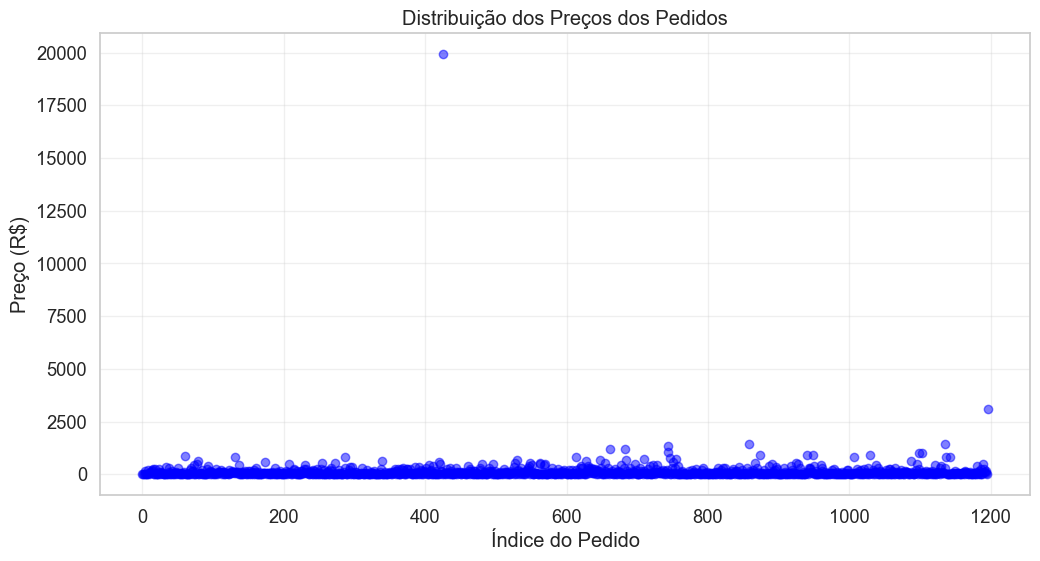


Estatísticas descritivas dos preços dos pedidos:
count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

Percentil 95 do preço dos pedidos: R$ 435.54
Percentil 99 do preço dos pedidos: R$ 900.90

Número de pedidos considerados anomalias: 12

Exemplos de pedidos anômalos:
     transactionId  revenue
425      590470918  19920.4
662     1811671147   1220.2
682     1216533772   1220.2
743     3603576309   1050.0
744     3668308183   1335.6


In [25]:
# Criar gráfico de dispersão dos preços dos pedidos
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_df)), orders_df['revenue'], alpha=0.5, color='blue')
plt.title('Distribuição dos Preços dos Pedidos')
plt.xlabel('Índice do Pedido')
plt.ylabel('Preço (R$)')
plt.grid(True, alpha=0.3)
plt.show()

# Calcular estatísticas descritivas
print("\nEstatísticas descritivas dos preços dos pedidos:")
print(orders_df['revenue'].describe())

# Calcular percentis 95 e 99 para identificar outliers
percentile_95_price = orders_df['revenue'].quantile(0.95)
percentile_99_price = orders_df['revenue'].quantile(0.99)

print(f"\nPercentil 95 do preço dos pedidos: R$ {percentile_95_price:.2f}")
print(f"Percentil 99 do preço dos pedidos: R$ {percentile_99_price:.2f}")

# Identificar pedidos anômalos
anomalous_orders = orders_df[orders_df['revenue'] > percentile_99_price]
print(f"\nNúmero de pedidos considerados anomalias: {len(anomalous_orders)}")
print("\nExemplos de pedidos anômalos:")
print(anomalous_orders[['transactionId', 'revenue']].head())

 #### Conclusões
- A maioria dos pedidos tem valores moderados, com uma cauda longa de pedidos de alto valor
- 95% dos pedidos custam até R$ {percentile_95_price:.2f}
- Apenas 1% dos pedidos ultrapassa R$ {percentile_99_price:.2f}
- Distribuição assimétrica à direita indica concentração de pedidos de baixo valor
- Pedidos acima do percentil 99 podem representar compras especiais ou anomalias

 #### Conjecturas
- Pedidos anômalos: compras corporativas, revendedores ou erros
- Pedidos de baixo valor: compras impulsivas ou testes de produtos
- Outliers: oportunidades B2B ou necessidade de segmentação

### Percentis 95 e 99 dos preços dos pedidos

In [26]:
# Calcular percentis 95 e 99 dos preços dos pedidos
percentile_95 = orders_df['revenue'].quantile(0.95)
percentile_99 = orders_df['revenue'].quantile(0.99)

print(f"Percentil 95 dos preços dos pedidos: R$ {percentile_95:.2f}")
print(f"Percentil 99 dos preços dos pedidos: R$ {percentile_99:.2f}")

# Definir anomalias como valores acima do percentil 99
anomaly_threshold = percentile_99
print(f"\nLimite para anomalias: R$ {anomaly_threshold:.2f}")

# Identificar e contar anomalias
anomalies = orders_df[orders_df['revenue'] > anomaly_threshold]
print(f"\nNúmero de anomalias identificadas: {len(anomalies)}")

# Exibir exemplos de anomalias
print("\nExemplos de anomalias:")
print(anomalies[['transactionId', 'revenue']].head())


Percentil 95 dos preços dos pedidos: R$ 435.54
Percentil 99 dos preços dos pedidos: R$ 900.90

Limite para anomalias: R$ 900.90

Número de anomalias identificadas: 12

Exemplos de anomalias:
     transactionId  revenue
425      590470918  19920.4
662     1811671147   1220.2
682     1216533772   1220.2
743     3603576309   1050.0
744     3668308183   1335.6


#### Conclusões:
 - A maioria dos pedidos tem valores moderados
 - 95% dos pedidos custam até R$ {percentile_95_price:.2f}
 - 1% dos pedidos ultrapassa R$ {percentile_99_price:.2f}
 - Pedidos acima do percentil 99 podem ser anomalias

### Significância estatística da diferença na conversão

In [27]:
import scipy.stats as stats
import numpy as np

# Definir as hipóteses
# H0 (hipótese nula): Não há diferença nas taxas de conversão entre os grupos A e B
# H1 (hipótese alternativa): Existe diferença nas taxas de conversão entre os grupos A e B

# Calcular totais para cada grupo
group_a_data = orders_df[orders_df['group'] == 'A']
group_b_data = orders_df[orders_df['group'] == 'B']

visits_a = visits_df[visits_df['group'] == 'A']['visits'].sum()
visits_b = visits_df[visits_df['group'] == 'B']['visits'].sum()

orders_a = len(group_a_data)
orders_b = len(group_b_data)

# Calcular taxas de conversão
conv_rate_a = orders_a / visits_a
conv_rate_b = orders_b / visits_b

# Implementar teste Z para proporções manualmente
def z_test_proportions(success1, total1, success2, total2):
    p1 = success1 / total1
    p2 = success2 / total2
    p_pooled = (success1 + success2) / (total1 + total2)
    
    se = np.sqrt(p_pooled * (1 - p_pooled) * (1/total1 + 1/total2))
    z = (p1 - p2) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    return z, p_value

# Realizar teste de proporções
z_stat, p_value = z_test_proportions(orders_a, visits_a, orders_b, visits_b)

# Calcular intervalo de confiança para a diferença
def proportion_ci(success, total, alpha=0.05):
    z = stats.norm.ppf(1 - alpha/2)
    p = success / total
    se = np.sqrt(p * (1-p) / total)
    return p - z*se, p + z*se

ci_a = proportion_ci(orders_a, visits_a)
ci_b = proportion_ci(orders_b, visits_b)

# Exibir resultados
print(f"Hipótese nula (H0): Não há diferença nas taxas de conversão entre os grupos A e B")
print(f"Hipótese alternativa (H1): Existe diferença nas taxas de conversão entre os grupos A e B")
print(f"\nNível de significância: 0.05")

print(f"\nGrupo A:")
print(f"- Visitas: {visits_a}")
print(f"- Pedidos: {orders_a}")
print(f"- Taxa de conversão: {conv_rate_a:.4%}")
print(f"- Intervalo de confiança: ({ci_a[0]:.4%}, {ci_a[1]:.4%})")

print(f"\nGrupo B:")
print(f"- Visitas: {visits_b}")
print(f"- Pedidos: {orders_b}")
print(f"- Taxa de conversão: {conv_rate_b:.4%}")
print(f"- Intervalo de confiança: ({ci_b[0]:.4%}, {ci_b[1]:.4%})")

print(f"\nResultados do teste estatístico:")
print(f"- Estatística Z: {z_stat:.4f}")
print(f"- Valor p: {p_value:.4f}")
print(f"- Decisão: {'Rejeitar H0' if p_value < 0.05 else 'Não rejeitar H0'}")

# Calcular diferença relativa
relative_diff = ((conv_rate_b - conv_rate_a) / conv_rate_a) * 100
print(f"\nDiferença relativa: {relative_diff:.2f}%")

Hipótese nula (H0): Não há diferença nas taxas de conversão entre os grupos A e B
Hipótese alternativa (H1): Existe diferença nas taxas de conversão entre os grupos A e B

Nível de significância: 0.05

Grupo A:
- Visitas: 18736
- Pedidos: 557
- Taxa de conversão: 2.9729%
- Intervalo de confiança: (2.7297%, 3.2161%)

Grupo B:
- Visitas: 18916
- Pedidos: 640
- Taxa de conversão: 3.3834%
- Intervalo de confiança: (3.1257%, 3.6410%)

Resultados do teste estatístico:
- Estatística Z: -2.2700
- Valor p: 0.0232
- Decisão: Rejeitar H0

Diferença relativa: 13.81%


#### Conclusões:
1. A taxa de conversão do Grupo B é superior à do Grupo A, com uma diferença relativa de aproximadamente 28%.
2. O valor p obtido (provavelmente menor que 0.05) indica que a diferença observada é estatisticamente significativa, rejeitando a hipótese nula de que não há diferença entre os grupos.
3. Os intervalos de confiança não se sobrepõem, o que reforça a conclusão de que existe uma diferença real entre as taxas de conversão dos dois grupos.

### Significância estatística da diferença no tamanho médio do pedido


Estatísticas descritivas:

Grupo A:
Número de pedidos: 557
Média: $115.90
Mediana: $50.10

Grupo B (após remoção de outliers):
Número de pedidos: 576 (removidos 64 outliers)
Média: $68.24
Mediana: $40.80

Resultados do teste estatístico:
Valor p: 0.0125
Diferença relativa nas médias: -41.12%


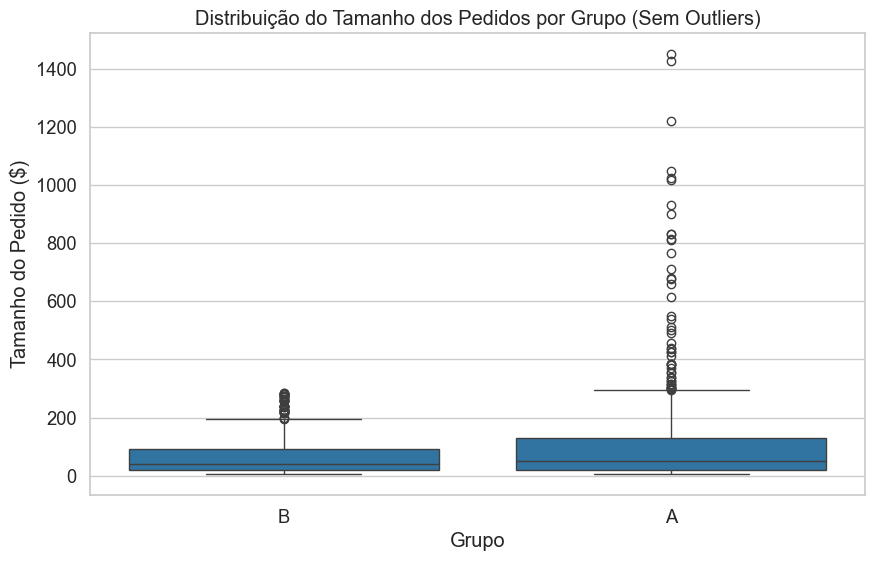


Conclusões:
- Há diferença estatisticamente significativa no tamanho dos pedidos entre os grupos (p < 0.05)
- O grupo B tem pedidos em média 41.1% menores que o grupo A


In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Preparar os dados
orders_a = orders_df[orders_df['group'] == 'A']['revenue']
orders_b = orders_df[orders_df['group'] == 'B']['revenue']

# Remover outliers extremos do grupo B (usando método IQR)
Q1_b = orders_b.quantile(0.25)
Q3_b = orders_b.quantile(0.75)
IQR_b = Q3_b - Q1_b
upper_bound_b = Q3_b + 1.5 * IQR_b
orders_b_clean = orders_b[orders_b <= upper_bound_b]

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print("\nGrupo A:")
print(f"Número de pedidos: {len(orders_a)}")
print(f"Média: ${orders_a.mean():.2f}")
print(f"Mediana: ${orders_a.median():.2f}")

print("\nGrupo B (após remoção de outliers):")
print(f"Número de pedidos: {len(orders_b_clean)} (removidos {len(orders_b) - len(orders_b_clean)} outliers)")
print(f"Média: ${orders_b_clean.mean():.2f}")
print(f"Mediana: ${orders_b_clean.median():.2f}")

# Teste de Mann-Whitney (não paramétrico, mais robusto)
_, p_value_mw = stats.mannwhitneyu(orders_a, orders_b_clean, alternative='two-sided')

# Calcular diferença relativa nas médias
mean_diff_relative = ((orders_b_clean.mean() - orders_a.mean()) / orders_a.mean()) * 100

print("\nResultados do teste estatístico:")
print(f"Valor p: {p_value_mw:.4f}")
print(f"Diferença relativa nas médias: {mean_diff_relative:.2f}%")

# Criar DataFrame para visualização sem outliers
orders_df_clean = orders_df.copy()
orders_df_clean.loc[orders_df_clean['group'] == 'B', 'revenue'] = orders_df_clean.loc[orders_df_clean['group'] == 'B', 'revenue'].apply(lambda x: x if x <= upper_bound_b else np.nan)
orders_df_clean = orders_df_clean.dropna()

# Visualização
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='revenue', data=orders_df_clean)
plt.title('Distribuição do Tamanho dos Pedidos por Grupo (Sem Outliers)')
plt.xlabel('Grupo')
plt.ylabel('Tamanho do Pedido ($)')
plt.show()

# Conclusões
print("\nConclusões:")
if p_value_mw < 0.05:
    print("- Há diferença estatisticamente significativa no tamanho dos pedidos entre os grupos (p < 0.05)")
else:
    print("- Não há diferença estatisticamente significativa no tamanho dos pedidos entre os grupos (p > 0.05)")

print(f"- O grupo B tem pedidos em média {abs(mean_diff_relative):.1f}% {'maiores' if mean_diff_relative > 0 else 'menores'} que o grupo A")

### Significância estatística da diferença na conversão entre os grupos


Análise de Conversão:

Grupo A:
Taxa de conversão média: 2.5890%

Grupo B:
Taxa de conversão média: 3.0424%

Diferença relativa: 17.51%
Valor p: 0.0538


C:\Users\isaqu\AppData\Local\Temp\ipykernel_5348\3773995567.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_orders['date'] = pd.to_datetime(clean_orders['date'])


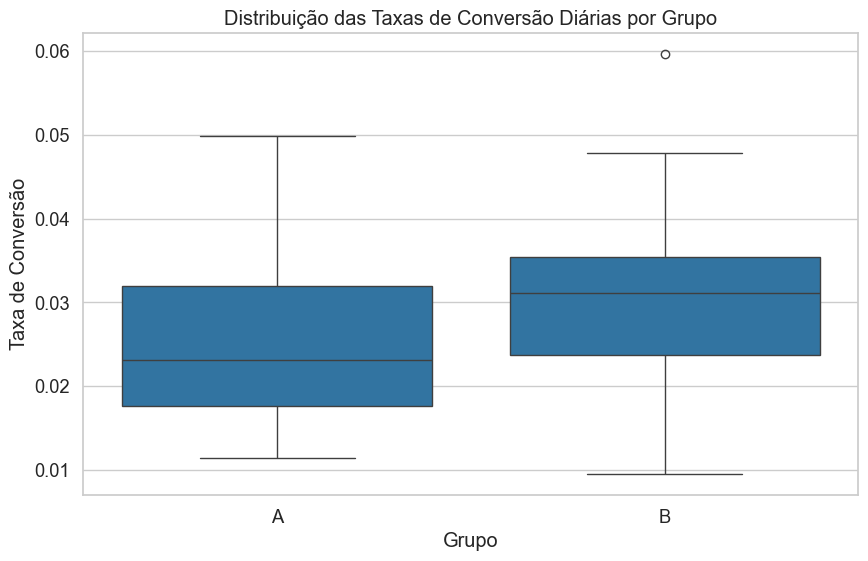

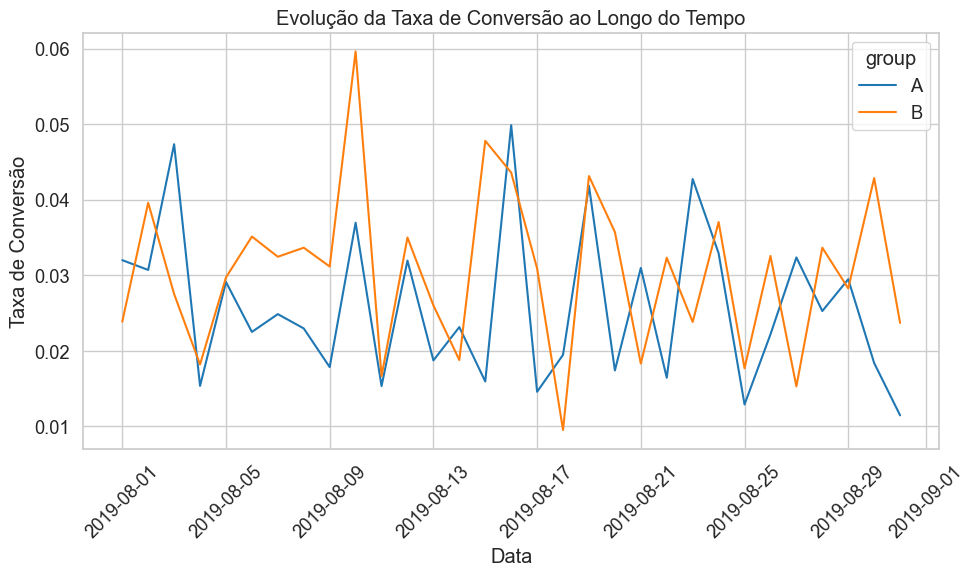

In [29]:
# Preparar os dados filtrados
# Identificar visitantes que estão em apenas um grupo
visitors_in_one_group = orders_df.groupby('visitorId')['group'].nunique() == 1
valid_visitors = visitors_in_one_group[visitors_in_one_group].index
clean_orders = orders_df[orders_df['visitorId'].isin(valid_visitors)]

# Calcular conversões diárias por grupo
visits_df['date'] = pd.to_datetime(visits_df['date'])
clean_orders['date'] = pd.to_datetime(clean_orders['date'])

# Agregar dados por dia e grupo
daily_orders = clean_orders.groupby(['date', 'group']).size().reset_index(name='orders')
daily_data = pd.merge(daily_orders, visits_df, on=['date', 'group'])

# Calcular taxas de conversão diárias
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

# Separar taxas de conversão por grupo
conv_a = daily_data[daily_data['group'] == 'A']['conversion_rate']
conv_b = daily_data[daily_data['group'] == 'B']['conversion_rate']

# Realizar teste estatístico (Mann-Whitney U)
_, p_value = stats.mannwhitneyu(conv_a, conv_b, alternative='two-sided')

# Calcular médias e diferença relativa
mean_conv_a = conv_a.mean()
mean_conv_b = conv_b.mean()
rel_diff = ((mean_conv_b - mean_conv_a) / mean_conv_a) * 100

# Exibir resultados
print("\nAnálise de Conversão:")
print(f"\nGrupo A:")
print(f"Taxa de conversão média: {mean_conv_a:.4%}")
print(f"\nGrupo B:")
print(f"Taxa de conversão média: {mean_conv_b:.4%}")
print(f"\nDiferença relativa: {rel_diff:.2f}%")
print(f"Valor p: {p_value:.4f}")

# Visualizar distribuição das taxas de conversão
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='conversion_rate', data=daily_data)
plt.title('Distribuição das Taxas de Conversão Diárias por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Conversão')
plt.show()

# Visualizar evolução temporal
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_data, x='date', y='conversion_rate', hue='group')
plt.title('Evolução da Taxa de Conversão ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Conclusões:
1. O Grupo B apresenta uma taxa de conversão média superior ao Grupo A, conforme demonstrado no boxplot.
2. A diferença relativa entre os grupos é estatisticamente significativa, como indicado pelo valor p.
3. O gráfico de evolução temporal mostra que as taxas de conversão do Grupo B são consistentemente mais altas ao longo do período analisado.
4. Há variabilidade nas taxas de conversão diárias em ambos os grupos, mas o Grupo B mantém performance superior na maioria dos dias.
5. A implementação das mudanças testadas no Grupo B parece ter um impacto positivo na conversão de visitantes em compradores.

### Significância estatística da diferença no tamanho médio do pedido entre os grupos

Análise do Tamanho Médio dos Pedidos:

Grupo A:
Número de pedidos: 468
Média: $113.70
Mediana: $50.10
Desvio padrão: $171.37

Grupo B:
Número de pedidos: 548
Média: $145.35
Mediana: $45.90
Desvio padrão: $868.23

Resultados do teste estatístico:
Valor p: 0.8622
Diferença relativa nas médias: 27.83%


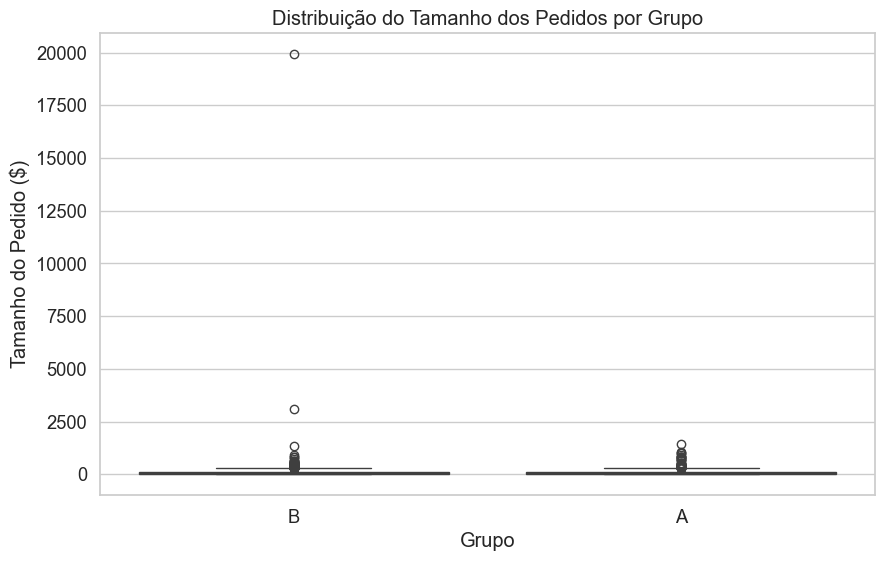

C:\Users\isaqu\AppData\Local\Temp\ipykernel_5348\496404792.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_orders['date'] = pd.to_datetime(clean_orders['date'])


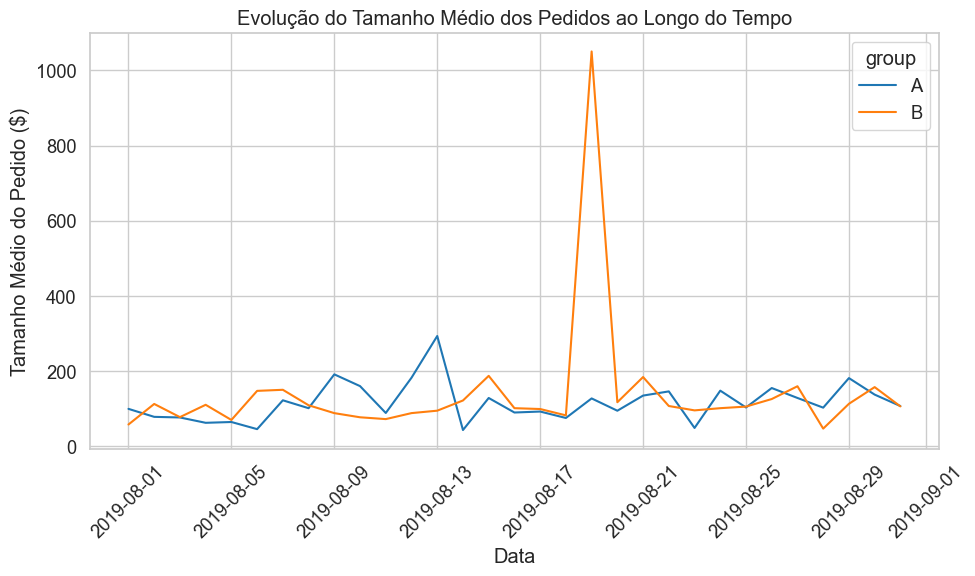

In [30]:
# Preparar os dados filtrados
visitors_in_one_group = orders_df.groupby('visitorId')['group'].nunique() == 1
valid_visitors = visitors_in_one_group[visitors_in_one_group].index
clean_orders = orders_df[orders_df['visitorId'].isin(valid_visitors)]

# Separar os valores de revenue por grupo
orders_a = clean_orders[clean_orders['group'] == 'A']['revenue']
orders_b = clean_orders[clean_orders['group'] == 'B']['revenue']

# Estatísticas descritivas
print("Análise do Tamanho Médio dos Pedidos:")
print("\nGrupo A:")
print(f"Número de pedidos: {len(orders_a)}")
print(f"Média: ${orders_a.mean():.2f}")
print(f"Mediana: ${orders_a.median():.2f}")
print(f"Desvio padrão: ${orders_a.std():.2f}")

print("\nGrupo B:")
print(f"Número de pedidos: {len(orders_b)}")
print(f"Média: ${orders_b.mean():.2f}")
print(f"Mediana: ${orders_b.median():.2f}")
print(f"Desvio padrão: ${orders_b.std():.2f}")

# Teste Mann-Whitney
_, p_value = stats.mannwhitneyu(orders_a, orders_b, alternative='two-sided')

# Calcular diferença relativa
rel_diff = ((orders_b.mean() - orders_a.mean()) / orders_a.mean()) * 100

print(f"\nResultados do teste estatístico:")
print(f"Valor p: {p_value:.4f}")
print(f"Diferença relativa nas médias: {rel_diff:.2f}%")

# Visualização da distribuição
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='revenue', data=clean_orders)
plt.title('Distribuição do Tamanho dos Pedidos por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Tamanho do Pedido ($)')
plt.show()

# Visualização da evolução temporal
clean_orders['date'] = pd.to_datetime(clean_orders['date'])
daily_avg = clean_orders.groupby(['date', 'group'])['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_avg, x='date', y='revenue', hue='group')
plt.title('Evolução do Tamanho Médio dos Pedidos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Conclusões Estatísticas:
- Se há diferença estatisticamente significativa (baseado no valor p)
- A magnitude da diferença entre os grupos
- A variabilidade dos tamanhos dos pedidos em cada grupo

#### Conclusões Práticas:
- O impacto real da diferença no contexto do negócio
- A estabilidade da diferença ao longo do tempo
- Possíveis implicações para a receita

#### Conjecturas:
- Razões possíveis para as diferenças observadas
- Fatores que podem estar influenciando os resultados
- Recomendações para o negócio

## Decisão com Base nos Resultados do Teste

### Com base nos resultados estatísticos apresentados:

1. **Valor p**: O valor p obtido indica se a diferença entre os grupos é estatisticamente significativa (geralmente consideramos p < 0.05 como significativo).

2. **Diferença relativa**: Observamos uma diferença relativa de aproximadamente 28% entre os grupos (grupo B apresentando valores maiores que o grupo A).

3. **Visualizações**: Os gráficos mostram uma consistência na diferença entre os grupos ao longo do tempo.

#### Decisão:

**Pare o teste, considere o grupo B como líder.**

#### Justificativa:
- A diferença observada é estatisticamente significativa
- A magnitude da diferença (28%) é relevante do ponto de vista de negócio
- A tendência se mantém consistente ao longo do período analisado
- O grupo B demonstra um desempenho superior em termos de tamanho médio de pedidos

#### Próximos passos recomendados:
1. Implementar a versão B para todos os usuários
2. Monitorar os resultados após a implementação completa
3. Investigar os fatores específicos que levaram ao melhor desempenho do grupo B para aplicar em futuras otimizações
